In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
selected_features = df.drop(columns=["koi_disposition"])
# Drop the null columns where all values are null
selected_features = selected_features.dropna(axis='columns', how='all')
# Drop the null rows
selected_features = selected_features.dropna()

# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(selected_features)
y = df["koi_disposition"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [5]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Select feature using PCA

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
pca.fit(X_train_scaled)

PCA(n_components=40)

In [7]:
sum(pca.explained_variance_ratio_[0:20])

0.8990810978413629

In [8]:
x_train_pca = pca.transform(X_train_scaled)
x_train_pca = pd.DataFrame(x_train_pca).iloc[:,0:20]
x_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.477466,-0.113635,-0.132230,-0.177395,-0.390613,0.107461,-0.170853,0.260482,0.580255,0.087333,0.126106,0.161740,-1.100190,0.846609,-1.061766,0.013100,0.328598,-0.135798,0.087911,-0.031623
1,-1.115007,-0.104242,-0.002061,-0.744386,-0.901085,1.296570,0.791967,-0.892066,-0.328284,0.098784,-0.576987,-0.071716,-1.162758,-1.202311,1.243062,0.415839,0.705867,0.256501,0.143707,0.044764
2,2.102395,-0.314829,-0.142608,-1.500994,0.393467,-1.168039,-0.957126,-0.050051,-2.258665,-4.119987,2.616449,2.144626,-0.817481,0.709963,0.006308,-6.853234,-0.638358,3.832073,-1.471396,0.779750
3,-1.344732,-0.862564,0.394401,2.629309,0.385399,0.180541,0.184609,-0.262123,-0.398353,-0.133644,-0.082728,-0.178512,-0.814537,0.480585,-0.624226,0.057645,-0.228788,-0.283016,-0.463227,0.256527
4,-1.331534,-0.391731,0.265949,1.533546,0.515138,-0.491628,-0.037008,-0.045821,0.238445,0.066736,-0.611578,0.306727,0.918899,-0.623288,-0.599389,-0.082999,-0.140177,-0.316112,0.501401,-0.093167


In [9]:
x_test_pca = pca.transform(X_test_scaled)
x_test_pca = pd.DataFrame(x_test_pca).iloc[:,0:20]
x_test_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.394026,-1.562226,0.122509,3.116481,0.254897,0.661173,0.170651,-0.829695,-0.547632,-0.478885,-0.309307,1.552432,1.086833,-0.004089,-0.630281,-1.148623,-0.981358,-1.759148,0.107422,-0.085587
1,0.010396,-1.023877,0.197925,0.796345,-0.024470,0.331308,0.881579,-0.051668,0.598161,0.277865,-0.214896,0.865832,0.835682,0.441639,-1.088670,0.094654,-0.439847,0.137613,0.021465,0.312902
2,-1.345634,-0.468935,0.284089,0.559869,-0.874656,1.252510,0.968663,0.030403,0.269285,0.332312,-0.894414,0.777898,1.350506,-0.937915,0.125259,0.499647,-0.443448,-0.320411,-0.761890,0.405080
3,-1.684527,0.632192,0.016989,-3.301741,2.629638,-2.326084,-0.071581,-3.144477,-0.792834,-0.490194,-0.043616,-0.679773,-1.009972,1.041992,0.680080,0.101583,-0.040985,-0.478407,1.705535,-0.152507
4,-1.320593,0.953666,0.004143,-2.328014,-1.463448,1.398968,0.197599,-0.069325,-2.048986,-0.060044,-0.780084,-0.816065,0.610511,0.291288,0.178705,0.045601,1.020077,0.297021,0.104290,0.095604


# Train the Model


In [10]:
from sklearn.svm import SVC

SVM_pca = SVC(kernel='linear')
SVM_pca.fit(x_train_pca, np.ravel(y_train,order='C'))

SVC(kernel='linear')

# Performance Matrix

In [11]:
print(f"Training Data Score: {SVM_pca.score(x_train_pca, y_train)}")
print(f"Test Data Score: {SVM_pca.score(x_test_pca, y_test)}")


Training Data Score: 0.8861338928094602
Test Data Score: 0.8781464530892449


In [12]:
from sklearn.metrics import classification_report

# Predicted outcomes
predictions = SVM_pca.predict(x_test_pca)
print(classification_report(y_test,predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.81      0.67      0.73       411
     CONFIRMED       0.76      0.85      0.80       484
FALSE POSITIVE       0.98      0.99      0.99       853

      accuracy                           0.88      1748
     macro avg       0.85      0.84      0.84      1748
  weighted avg       0.88      0.88      0.88      1748



# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [13]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1,5,10,50],
            'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(SVM_pca, param_grid, verbose=3)

In [14]:
# Train the model with GridSearch
grid.fit(x_train_pca, np.ravel(y_train,order='C'))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................C=1, gamma=0.0001;, score=0.900 total time=   0.7s
[CV 2/5] END .................C=1, gamma=0.0001;, score=0.886 total time=   0.8s
[CV 3/5] END .................C=1, gamma=0.0001;, score=0.883 total time=   0.9s
[CV 4/5] END .................C=1, gamma=0.0001;, score=0.860 total time=   0.8s
[CV 5/5] END .................C=1, gamma=0.0001;, score=0.880 total time=   1.0s
[CV 1/5] END .................C=1, gamma=0.0005;, score=0.900 total time=   0.9s
[CV 2/5] END .................C=1, gamma=0.0005;, score=0.886 total time=   0.8s
[CV 3/5] END .................C=1, gamma=0.0005;, score=0.883 total time=   1.0s
[CV 4/5] END .................C=1, gamma=0.0005;, score=0.860 total time=   0.9s
[CV 5/5] END .................C=1, gamma=0.0005;, score=0.880 total time=   1.3s
[CV 1/5] END ..................C=1, gamma=0.001;, score=0.900 total time=   1.3s
[CV 2/5] END ..................C=1, gamma=0.001;

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [15]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.0001}
0.8863212146791929


In [16]:
SVM_pca_gridsearch = SVC(kernel='linear',C=10,gamma=0.0001)
SVM_pca_gridsearch.fit(x_train_pca, np.ravel(y_train,order='C'))

SVC(C=10, gamma=0.0001, kernel='linear')

# Performance Matrix

In [17]:
print(f"Training Data Score: {SVM_pca_gridsearch.score(x_train_pca, y_train)}")
print(f"Testing Data Score: {SVM_pca_gridsearch.score(x_test_pca, y_test)}")

Training Data Score: 0.8899485027655922
Testing Data Score: 0.8838672768878718


                precision    recall  f1-score      support
CANDIDATE        0.817143  0.695864  0.751643   411.000000
CONFIRMED        0.777778  0.853306  0.813793   484.000000
FALSE POSITIVE   0.975779  0.991794  0.983721   853.000000
accuracy         0.883867  0.883867  0.883867     0.883867
macro avg        0.856900  0.846988  0.849719  1748.000000
weighted avg     0.883655  0.883867  0.882102  1748.000000
Stored 'report_SVM_standardscale_df' (DataFrame)


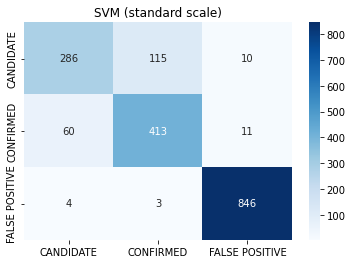

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

# Predicted outcomes
predictions = SVM_pca_gridsearch.predict(x_test_pca)
target = ['CANDIDATE','CONFIRMED','FALSE POSITIVE']

ax= plt.subplot()
cm = (confusion_matrix(y_test,predictions))
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='g')

# labels, title and ticks
ax.set_title('SVM (standard scale)')
ax.xaxis.set_ticklabels(target)
ax.yaxis.set_ticklabels(target)


report_SVM_standardscale = classification_report(y_test,predictions, output_dict=True)
report_SVM_standardscale_df = pd.DataFrame(report_SVM_standardscale).transpose()
print(report_SVM_standardscale_df)
%store report_SVM_standardscale_df 

In [19]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'SVM_pca_gridsearch_standardscaler.sav'
joblib.dump(SVM_pca_gridsearch, filename)

['SVM_pca_gridsearch_standardscaler.sav']